# Final Project Report

* Class: DS 5100
* Student Name:
* Student Net ID:
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [62]:
# A code block with your classes.

import numpy as np
import pandas as pd

class Die:
    def __init__(self, faces): 

        if not isinstance(faces, np.ndarray):
            raise TypeError("Input faces should be a numpy array")

        if faces.dtype.kind not in ['i', 'u', 'f', 'U', 'S']:
            raise TypeError("Faces should contain either strings or numbers")

        if len(faces) != len(np.unique(faces)):
            raise ValueError("All faces should be distinct")

        weights = np.ones_like(faces, dtype=float)

        self._data = pd.DataFrame({'weights': weights}, index=faces)

    def change_weight(self, face, new_weight):
        if face not in self._data.index:
            raise IndexError("Face not found on die")

        if not isinstance(new_weight, (int, float)):
            raise TypeError("Weight should be numeric (int or float)")

        if new_weight < 0:
            raise ValueError("Weight should be non-negative")

        self._data.at[face, 'weights'] = new_weight

    def roll(self, times=1): 
        if not isinstance(times, int) or times <= 0:
            raise ValueError("'times' should be a positive integer")

        results = self._data.sample(n=times, weights='weights', replace=True).index.tolist()
        return results

    def show_state(self):
        return self._data.copy()

###############################################################################

import numpy as np
#import pandas as pd
#import Die


class Game:
    def __init__(self, dice_list): 
        self.dice = dice_list
        self._results = None 

    def play(self, num_rolls):
        results = []

        for roll_num in range(num_rolls):
            roll_results = []
            for die in self.dice:
                roll_results.append(die.roll()[0])
            results.append(roll_results)
        
        self._results = pd.DataFrame(results, columns=[f"Die_{i+1}" for i in range(len(self.dice))])

    def show_results(self, format="wide"):
        if self._results is None:
            raise ValueError("No game has been played yet!")

        if format == "wide":
            return self._results.copy()
        elif format == "narrow":
            narrow_df = self._results.stack().reset_index()
            narrow_df.columns = ['Roll_Num', 'Die_Num', 'Outcome']
            narrow_df.set_index(['Roll_Num', 'Die_Num'], inplace=True)
            return narrow_df
        else:
            raise ValueError("Invalid option. Choose 'wide' or 'narrow'.")

###############################################################################

import numpy as np
#from die import Die
#from game import Game

class Analyzer:
    def __init__(self, game):
        if not isinstance(game, Game):
            raise ValueError("Expected a Game object")
        self.game = game

    def jackpot(self):
        if self.game._results is None:
            raise ValueError("No game has been played yet!")

        return (self.game._results.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        if self.game._results is None:
            raise ValueError("No game has been played yet!")

        all_faces = np.concatenate([die.show_state().index.to_numpy() for die in self.game.dice])
        all_faces = np.unique(all_faces)

        count_df = self.game._results.apply(lambda row: [row.tolist().count(face) for face in all_faces], axis=1, result_type="expand")
        count_df.columns = all_faces
        return count_df

    def combo_count(self):
        if self.game._results is None:
            raise ValueError("No game has been played yet!")

        combos = self.game._results.apply(lambda x: tuple(sorted(x.tolist())), axis=1)
        counts = combos.value_counts()
        df = counts.reset_index()
        df.columns = ['Combo', 'Count']
        return df.set_index('Combo')

    def permutation_count(self):
        if self.game._results is None:
            raise ValueError("No game has been played yet!")

        permutations = self.game._results.apply(tuple, axis=1)
        counts = permutations.value_counts()
        df = counts.reset_index()
        df.columns = ['Permutation', 'Count']
        return df.set_index('Permutation')


   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      2.0
4      1.0
5      1.0
6      1.0
[3, 4, 6, 4, 3, 6, 4, 4, 6, 5]
   Die_1  Die_2
0      4      3
1      4      4
2      3      5
3      3      6
4      1      5
                  Outcome
Roll_Num Die_Num         
0        Die_1          4
         Die_2          3
1        Die_1          4
         Die_2          4
2        Die_1          3
         Die_2          5
3        Die_1          3
         Die_2          6
4        Die_1          1
         Die_2          5
The numeber of Jackpots: 0
   1  2  3  4  5  6
0  0  0  1  0  1  0
1  0  0  1  0  0  1
2  0  0  1  1  0  0
3  0  1  1  0  0  0
4  0  0  1  0  0  1
        Count
Combo        
(3, 6)      2
(3, 5)      1
(3, 4)      1
(2, 3)      1
             Count
Permutation       
(3, 6)           2
(5, 3)           1
(3, 4)           1
(3, 2)           1


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [97]:
import sys
sys.path.append("/Users/arnavboppudi/Desktop/msds_ds5100/FINAL PROJECT")

In [99]:
import montecarlo

   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      2.0
4      1.0
5      1.0
6      1.0
[2, 2, 6, 6, 2, 6, 3, 2, 5, 2]
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      2.0
4      1.0
5      1.0
6      1.0
[5, 3, 3, 3, 2, 3, 1, 2, 4, 3]
   Die_1  Die_2
0      3      3
1      4      4
2      5      1
3      3      4
4      1      3
                  Outcome
Roll_Num Die_Num         
0        Die_1          3
         Die_2          3
1        Die_1          4
         Die_2          4
2        Die_1          5
         Die_2          1
3        Die_1          3
         Die_2          4
4        Die_1          1
         Die_2          3
   Die_1  Die_2
0      1      3
1      2      2
2      6      3
3      5      6
4      5      2
                  Outcome
Roll_Num Die_Num         
0        Die_1          1
         Die_2          3
1        Die_1        

In [140]:
import unittest
import numpy as np
from montecarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    def test_init(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertIsInstance(die, Die)

        with self.assertRaises(ValueError):
            die = Die(np.array([1, 2, 3, 3, 5, 6]))

    def test_show_state(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertIsInstance(die.show_state(), pd.DataFrame)
        
    def test_change_weight(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        die.change_weight(3, 2.0)
        self.assertEqual(die.show_state().loc[3, 'weights'], 2.0)

    def test_roll(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        rolls = die.roll(10)
        self.assertEqual(len(rolls), 10)

class TestGame(unittest.TestCase):
    
    def test_init(self):
        game = Game([self.die1, self.die2])
        self.assertIsInstance(game, Game)
        
    def setUp(self):
        print("Setting up for a test...")
        self.die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.game = Game([self.die1, self.die2])

    def test_play(self):
        self.game.play(5)
        self.assertIsNotNone(self.game._results)
        
    def test_show_results(self):
        self.game.play(5)
        self.assertIsInstance(self.game.show_results(), pd.DataFrame)


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        self.die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.game = Game([self.die1, self.die2])
        self.analyzer = Analyzer(self.game)
    
    def test_init(self):
        analyzer = Analyzer(self.game)
        self.assertIsInstance(analyzer, Analyzer)
        
        with self.assertRaises(ValueError):
            analyzer = Analyzer("invalid game object")

    def test_jackpot(self):
        self.game.play(5)
        result = self.analyzer.jackpot()
        print(type(result))
        self.assertTrue(isinstance(result, (int, np.integer)))
 
    def test_face_counts_per_roll(self):
        self.game.play(5)
        self.assertIsInstance(self.analyzer.face_counts_per_roll(), pd.DataFrame)
        
    def test_combo_count(self):
        self.game.play(5)
        self.assertIsInstance(self.analyzer.combo_count(), pd.DataFrame)
        
    def test_permutation_count(self):
        self.game.play(5)
        self.assertIsInstance(self.analyzer.permutation_count(), pd.DataFrame)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


............
----------------------------------------------------------------------
Ran 12 tests in 0.076s

OK


<class 'numpy.int64'>
Setting up for a test...
Setting up for a test...
Setting up for a test...


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

``````

............
----------------------------------------------------------------------
Ran 12 tests in 0.076s

OK
<class 'numpy.int64'>
Setting up for a test...
Setting up for a test...
Setting up for a test...

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [6]:
# e.g. import montecarlo.montecarlo 

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [151]:
import numpy as np
import pandas as pd

class Die:
    """
    Represents a die with various faces and corresponding weights.

    Attributes:
        Faces: NumPy array of symbols. Symbols can be numeric or alphabetic.
        Weights: NumPy array of weights corresponding to each face.

    Methods:
        change_weight(): Change the weight of a specific face.
        roll(): Roll the die and get outcomes.
        show_state(): View the current state of the die (faces and weights).
    """

    def __init__(self, faces):
        """
        Accepts a NumPy array for faces as input. Raises a TypeError if the input isn't a NumPy array.
        The array's data type (dtype) can be either strings or numbers.
        The values in the array should be unique. If they aren't, a ValueError is raised after checking for distinctness.
        Sets the weights to for every face internally.
        Stores both the faces and their corresponding weights in a private dataframe, with faces as the index.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Input faces should be a numpy array")
        if faces.dtype.kind not in ['i', 'u', 'f', 'U', 'S']:
            raise TypeError("Faces should contain either strings or numbers")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("All faces should be distinct")

        weights = np.ones_like(faces, dtype=float)
        self._data = pd.DataFrame({'weights': weights}, index=faces)

    def change_weight(self, face, new_weight):
        """
        It accepts two parameters: the face value for adjustment and its new weight.
        Verifies whether the given face value exists within the die array. If it doesn't, an IndexError is raised.
        The method also ensures the provided weight is numeric (either an integer or float) or can be converted to a numeric type.
        If this condition isn't met, it triggers a TypeError.
        """
        if face not in self._data.index:
            raise IndexError("Face not found on die")
        if not isinstance(new_weight, (int, float)):
            raise TypeError("Weight should be numeric (int or float)")
        if new_weight < 0:
            raise ValueError("Weight should be non-negative")

        self._data.at[face, 'weights'] = new_weight

    def roll(self, times=1):
        """
        This method rolls the die multiple times.
        It accepts an argument indicating the number of rolls desired, defaulting to a single roll if not specified.
        It draws a random sample with replacement from the internal die data frame, taking into account the specified weights.
        The outcomes are presented as a Python list.
        """
        if not isinstance(times, int) or times <= 0:
            raise ValueError("'times' should be a positive integer")
        results = self._data.sample(n=times, weights='weights', replace=True).index.tolist()
        return results

    def show_state(self):
        """Returns a duplicate of the internal die data frame."""
        return self._data.copy()

###############################################################################

class Game:
    """
    Manages and plays games involving similar dice rolls.

    Attributes:
        dice_list (list of Die objects): List of dice used in the game.

    Methods:
        __init__():
            Initializes the game with a list of dice.
        play():
            Rolls all dice for a specified number of times and saves results.
        show_results():
            Returns a copy of the play results. Supports 'wide' and 'narrow' formats.
    """

    def __init__(self, dice_list):
        """
        Accepts a single argument, which is a list of previously created dice of similar type.
        While it would be ideal to verify that the list consists of Die objects with identical faces, it isn't mandatory for this project. 
        """
        self.dice = dice_list
        self._results = None 

    def play(self, num_rolls):
        """
        Accepts an integer to determine the number of dice rolls.
        Stores the play outcome in a private data frame.
        The data frame is structured in a wide format with the roll number as a named index, columns labeled by die number (using its list position), and each cell showing the rolled face.
        """
        results = []

        for roll_num in range(num_rolls):
            roll_results = []
            for die in self.dice:
                roll_results.append(die.roll()[0])  
            results.append(roll_results)
        
        self._results = pd.DataFrame(results, columns=[f"Die_{i+1}" for i in range(len(self.dice))])

    def show_results(self, format="wide"):
        """
        This method provides a copy of the private play data frame.
        Accepts a format parameter (defaulting to "wide") to return the data in either narrow or wide form.
        In narrow form, the data frame has a MultiIndex of roll number and die number, with a column displaying the rolled face.
        Raises a ValueError for an invalid format choice.
        """
        if self._results is None:
            raise ValueError("No game has been played yet!")
        if format == "wide":
            return self._results.copy()
        elif format == "narrow":
            narrow_df = self._results.stack().reset_index()
            narrow_df.columns = ['Roll_Num', 'Die_Num', 'Outcome']
            narrow_df.set_index(['Roll_Num', 'Die_Num'], inplace=True)
            return narrow_df
        else:
            raise ValueError("Invalid option. Choose 'wide' or 'narrow'.")

###############################################################################

class Analyzer:
    """
    Analyzes game results to provide descriptive statistics.

    Attributes:
        game_obj (Game object): Input game for analysis.

    Methods:
        jackpot(): 
            Counts instances where all rolled faces are identical.
        face_counts_per_roll():
            Returns a data frame detailing face frequencies per roll.
        combo_count():
            Gives counts of distinct face combinations.
        permutation_count():
            Gives counts of distinct face permutations.
    """

    def __init__(self, game):
        """Takes a game object as input. Raises a ValueError if the input isn't a Game object."""
        if not isinstance(game, Game):
            raise ValueError("Expected a Game object")
        self.game = game

    def jackpot(self):
        """
        A jackpot occurs when all dice faces match, like getting all ones on a six-sided die. 
        Calculates the total jackpots and returns the count as an integer.
        """
        if self.game._results is None:
            raise ValueError("No game has been played yet!")
        return (self.game._results.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        """
        Calculates the frequency of each face in every roll. For instance, a five-dice roll showing all sixes would yield a count of 5 for '6' and 0 for other faces. 
        It returns the outcomes in a wide-format data frame with roll numbers as indices, face values as columns, and counts as cell entries.
        """
        if self.game._results is None:
            raise ValueError("No game has been played yet!")
        all_faces = np.concatenate([])

In [152]:
help(Die)

Help on class Die in module __main__:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  Represents a die with various faces and corresponding weights.
 |  
 |  Attributes:
 |      Faces: NumPy array of symbols. Symbols can be numeric or alphabetic.
 |      Weights: NumPy array of weights corresponding to each face.
 |  
 |  Methods:
 |      change_weight(): Change the weight of a specific face.
 |      roll(): Roll the die and get outcomes.
 |      show_state(): View the current state of the die (faces and weights).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Accepts a NumPy array for faces as input. Raises a TypeError if the input isn't a NumPy array.
 |      The array's data type (dtype) can be either strings or numbers.
 |      The values in the array should be unique. If they aren't, a ValueError is raised after checking for distinctness.
 |      Sets the weights to for every face internally.
 |      Stores both the faces and their corresponding weights 

In [153]:
help(Game)

Help on class Game in module __main__:

class Game(builtins.object)
 |  Game(dice_list)
 |  
 |  Manages and plays games involving similar dice rolls.
 |  
 |  Attributes:
 |      dice_list (list of Die objects): List of dice used in the game.
 |  
 |  Methods:
 |      __init__():
 |          Initializes the game with a list of dice.
 |      play():
 |          Rolls all dice for a specified number of times and saves results.
 |      show_results():
 |          Returns a copy of the play results. Supports 'wide' and 'narrow' formats.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice_list)
 |      Accepts a single argument, which is a list of previously created dice of similar type.
 |      While it would be ideal to verify that the list consists of Die objects with identical faces, it isn't mandatory for this project.
 |  
 |  play(self, num_rolls)
 |      Accepts an integer to determine the number of dice rolls.
 |      Stores the play outcome in a private data frame.
 |    

In [154]:
help(Analyzer)

Help on class Analyzer in module __main__:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  Analyzes game results to provide descriptive statistics.
 |  
 |  Attributes:
 |      game_obj (Game object): Input game for analysis.
 |  
 |  Methods:
 |      jackpot(): 
 |          Counts instances where all rolled faces are identical.
 |      face_counts_per_roll():
 |          Returns a data frame detailing face frequencies per roll.
 |      combo_count():
 |          Gives counts of distinct face combinations.
 |      permutation_count():
 |          Gives counts of distinct face permutations.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Takes a game object as input. Raises a ValueError if the input isn't a Game object.
 |  
 |  face_counts_per_roll(self)
 |      Calculates the frequency of each face in every roll. For instance, a five-dice roll showing all sixes would yield a count of 5 for '6' and 0 for other faces. 
 |      It returns the outcomes in

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

https://github.com/arnavboppudi/ab2kk_ds5100_montecarlo/blob/main/README.md

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [16]:
# Example Usage
coin_1 = Die(np.array([1, 2]))
print(coin_1.show_state())

coin_1.change_weight(1, 1.0) 
print(coin_1.show_state())

print("Flips:" , coin_1.roll(10)) 

coinunfair_1 = Die(np.array([1, 2]))
print(coinunfair_1.show_state())

coinunfair_1.change_weight(1, 5.0)  # Make the side with value 1, 5 times more likely to appear
print(coinunfair_1.show_state())

print("Flips:" , coinunfair_1.roll(10))  # Roll the die 10 times


   weights
1      1.0
2      1.0
   weights
1      1.0
2      1.0
Flips: [1, 1, 1, 1, 1, 2, 1, 2, 1, 1]
   weights
1      1.0
2      1.0
   weights
1      5.0
2      1.0
Flips: [1, 1, 2, 1, 1, 1, 2, 1, 1, 1]


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [17]:
twoCoinGame = Game([coin_1, coinunfair_1])
twoCoinGame.play(1000)

twoCoinGame.show_results()
twoCoinGame.show_results(format="narrow")

Outcome
Roll_Num Die_Num         
0        Die_1          1
         Die_2          1
1        Die_1          2
         Die_2          2
2        Die_1          1
...                   ...
997      Die_2          1
998      Die_1          2
         Die_2          1
999      Die_1          2
         Die_2          1

[2000 rows x 1 columns]

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [18]:
# Example Usage

threeCoinGame = Game([coin_1, coinunfair_1, coinunfair_1])
threeCoinGame.play(1000)

threeCoinGame.show_results()
threeCoinGame.show_results(format="narrow")

Outcome
Roll_Num Die_Num         
0        Die_1          2
         Die_2          1
         Die_3          1
1        Die_1          2
         Die_2          1
...                   ...
998      Die_2          2
         Die_3          1
999      Die_1          2
         Die_2          1
         Die_3          1

[3000 rows x 1 columns]

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [25]:
analyzer_1 = Analyzer(twoCoinGame)
analyzer_2 = Analyzer(threeCoinGame)

print("The number of Jackpots:", analyzer_1.jackpot())
#print(analyzer_1.face_counts_per_roll())
#print(analyzer_1.combo_count())
#print(analyzer_1.permutation_count())

print("The number of Jackpots:", analyzer_2.jackpot())
#print(analyzer_2.face_counts_per_roll())
#print(analyzer_2.combo_count())
#print(analyzer_2.permutation_count())

The number of Jackpots: 491
The number of Jackpots: 381


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [26]:
analyzer_1 = Analyzer(twoCoinGame)
analyzer_2 = Analyzer(threeCoinGame)

print("Relative Frequency:", analyzer_1.jackpot()/1000)

print("Relative Frequency:", analyzer_2.jackpot()/1000)


Relative Frequency: 0.491
Relative Frequency: 0.381


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Relative Frequencies of Analyzer 1 and Analyzer 2')

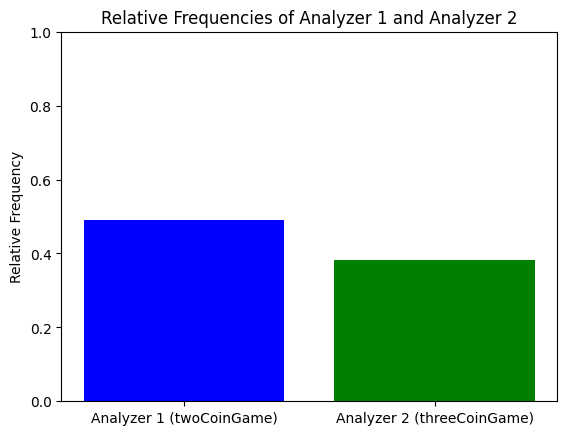

In [30]:
import matplotlib.pyplot as plt

# Results
analyzer_1_rf = 0.491
analyzer_2_rf = 0.381

# Names of the analyzers
analyzers = ['Analyzer 1 (twoCoinGame)', 'Analyzer 2 (threeCoinGame)']

# Relative Frequencies
frequencies = [analyzer_1_rf, analyzer_2_rf]

# Create the bar chart
plt.bar(analyzers, frequencies, color=['blue', 'green'])
plt.ylim(0, 1)  # To have a consistent scale
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Analyzer 1 and Analyzer 2')


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [34]:
# Example Usage
dice_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(coin_1.show_state())

#dice_1.change_weight(1, 1.0) 
print(dice_1.show_state())

dice_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_2.show_state())

#dice_2.change_weight(1, 1.0) 
print(dice_2.show_state())


dice_3 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_3.show_state())

#dice_3.change_weight(1, 1.0) 
print(dice_3.show_state())

print("DICE 1 ROLL:" , dice_1.roll(10))  # Roll the die 10 times
print("DICE 2 ROLL:" , dice_2.roll(10))  # Roll the die 10 times
print("DICE 3 ROLL:" , dice_3.roll(10))  # Roll the die 10 times

   weights
1      1.0
2      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
DICE 1 ROLL: [6, 4, 1, 3, 4, 3, 3, 5, 3, 5]
DICE 2 ROLL: [5, 5, 6, 2, 1, 5, 3, 4, 3, 3]
DICE 3 ROLL: [3, 6, 1, 5, 6, 6, 3, 1, 1, 2]


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [35]:
dice_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(coin_1.show_state())

dice_1.change_weight(6, 5.0) 
print(dice_1.show_state())

dice_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_2.show_state())

#dice_2.change_weight(1, 1.0) 
print(dice_2.show_state())


dice_3 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_3.show_state())

#dice_3.change_weight(1, 1.0) 
print(dice_3.show_state())


print("DICE 1 ROLL:" , dice_1.roll(10))  # Roll the die 10 times
print("DICE 2 ROLL:" , dice_2.roll(10))  # Roll the die 10 times
print("DICE 3 ROLL:" , dice_3.roll(10))  # Roll the die 10 times


   weights
1      1.0
2      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      5.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
DICE 1 ROLL: [1, 6, 6, 6, 4, 4, 6, 1, 6, 6]
DICE 2 ROLL: [3, 3, 5, 2, 1, 3, 2, 1, 5, 1]
DICE 3 ROLL: [4, 5, 4, 4, 3, 6, 2, 2, 5, 6]


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [40]:
dice_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(coin_1.show_state())

dice_1.change_weight(6, 5.0) 
print(dice_1.show_state())

dice_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_2.show_state())

dice_2.change_weight(1, 5.0)  # Make the side 1 with value 5 more likely to appear
print(dice_2.show_state())


dice_3 = Die(np.array([1, 2, 3, 4, 5, 6]))
print(dice_3.show_state())

#dice_3.change_weight(1, 1.0) 
print(dice_3.show_state())


print("DICE 1 ROLL:" , dice_1.roll(10))  # Roll the die 10 times
print("DICE 2 ROLL:" , dice_2.roll(10))  # Roll the die 10 times
print("DICE 3 ROLL:" , dice_3.roll(10))  # Roll the die 10 times

   weights
1      1.0
2      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      5.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      5.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
DICE 1 ROLL: [1, 6, 6, 5, 6, 3, 6, 6, 6, 6]
DICE 2 ROLL: [1, 4, 1, 1, 1, 1, 1, 1, 2, 1]
DICE 3 ROLL: [6, 6, 4, 6, 5, 2, 4, 6, 5, 6]


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [43]:
game_five_fair = Game([dice_3, dice_3, dice_3, dice_3, dice_3])
game_five_fair.play(10000)

print(game_five_fair.show_results())
print(game_five_fair.show_results(format="narrow"))

      Die_1  Die_2  Die_3  Die_4  Die_5
0         1      4      3      4      2
1         2      1      1      5      2
2         4      2      1      6      5
3         5      6      1      6      6
4         3      6      3      5      6
...     ...    ...    ...    ...    ...
9995      4      6      6      4      6
9996      6      2      1      4      2
9997      2      2      2      2      5
9998      2      6      3      1      6
9999      2      2      2      5      6

[10000 rows x 5 columns]
                  Outcome
Roll_Num Die_Num         
0        Die_1          1
         Die_2          4
         Die_3          3
         Die_4          4
         Die_5          2
...                   ...
9999     Die_1          2
         Die_2          2
         Die_3          2
         Die_4          5
         Die_5          6

[50000 rows x 1 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [44]:
game_two_unfair = Game([dice_1, dice_2, dice_3, dice_3, dice_3])
game_two_unfair.play(10000)

print(game_two_unfair.show_results())
print(game_two_unfair.show_results(format="narrow"))

      Die_1  Die_2  Die_3  Die_4  Die_5
0         6      1      6      5      2
1         6      4      4      6      4
2         3      6      6      4      4
3         3      1      2      2      1
4         6      1      1      1      4
...     ...    ...    ...    ...    ...
9995      5      1      1      5      5
9996      3      6      4      1      3
9997      2      2      6      3      6
9998      2      1      4      4      5
9999      2      3      1      6      2

[10000 rows x 5 columns]
                  Outcome
Roll_Num Die_Num         
0        Die_1          6
         Die_2          1
         Die_3          6
         Die_4          5
         Die_5          2
...                   ...
9999     Die_1          2
         Die_2          3
         Die_3          1
         Die_4          6
         Die_5          2

[50000 rows x 1 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [45]:
analyzer_1 = Analyzer(game_five_fair)
analyzer_2 = Analyzer(game_two_unfair)

print("Relative Frequency:", analyzer_1.jackpot()/1000)

print("Relative Frequency:", analyzer_2.jackpot()/1000)


Relative Frequency: 0.008
Relative Frequency: 0.007


Text(0.5, 1.0, 'Relative Frequencies of Analyzer 1 and Analyzer 2')

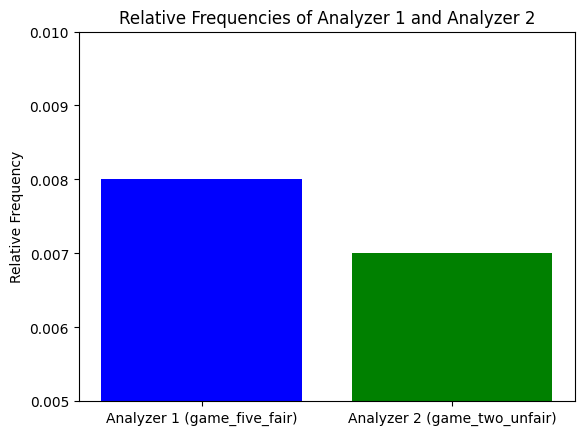

In [148]:
import matplotlib.pyplot as plt

# Results
analyzer_1_rf_2 = 0.008
analyzer_2_rf_2 = 0.007

# Names of the analyzers
analyzers = ['Analyzer 1 (game_five_fair)', 'Analyzer 2 (game_two_unfair)']

# Relative Frequencies
frequencies_1 = [analyzer_1_rf_2, analyzer_2_rf_2]

# Create the bar chart
plt.bar(analyzers, frequencies_1, color=['blue', 'green'])
plt.ylim(0.005,0.01)  # To have a consistent scale
plt.ylabel('Relative Frequency')
plt.title('Relative Frequencies of Analyzer 1 and Analyzer 2')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [132]:
english_letters = pd. read_csv('english_letters.txt', delimiter=' ', header=None)
scrabble_words = pd. read_csv('scrabble_words.txt', header=None)

In [133]:
import numpy as np

# Open the file for reading and parse its content
with open('english_letters.txt', 'r') as file:
    lines = file.readlines()
    
    # Each line has format 'LETTER FREQUENCY'
    letters = np.array([line.split()[0] for line in lines])
    frequencies = [int(line.split()[1]) for line in lines]

# Assuming the Die class is already defined
# Instantiate the die
die_alpha = Die(letters)

# Assign weights to the die using the frequencies
for letter, frequency in zip(letters, frequencies):
    die_alpha.change_weight(letter, frequency)

# Display and test the die
print(die_alpha.show_state())
print("Flips:", die_alpha.roll(10))  # Roll the die 10 times

       weights
E  529117365.0
T  390965105.0
A  374061888.0
O  326627740.0
I  320410057.0
N  313720540.0
S  294300210.0
R  277000841.0
H  216768975.0
L  183996130.0
D  169330528.0
C  138416451.0
U  117295780.0
M  110504544.0
F   95422055.0
G   91258980.0
P   90376747.0
W   79843664.0
Y   75294515.0
B   70195826.0
V   46337161.0
K   35373464.0
J    9613410.0
X    8369915.0
Z    4975847.0
Q    4550166.0
Flips: ['N', 'B', 'L', 'D', 'C', 'T', 'H', 'S', 'F', 'L']


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [134]:
alpha_game = Game([die_alpha, die_alpha, die_alpha, die_alpha])
alpha_game.play(1000)

print(alpha_game.show_results())
print(alpha_game.show_results(format="narrow"))

    Die_1 Die_2 Die_3 Die_4
0       O     R     H     N
1       E     I     T     O
2       O     A     T     O
3       R     N     X     N
4       R     N     I     Y
..    ...   ...   ...   ...
995     F     A     E     H
996     E     E     R     T
997     N     S     W     G
998     F     W     S     E
999     T     N     A     W

[1000 rows x 4 columns]
                 Outcome
Roll_Num Die_Num        
0        Die_1         O
         Die_2         R
         Die_3         H
         Die_4         N
1        Die_1         E
...                  ...
998      Die_4         E
999      Die_1         T
         Die_2         N
         Die_3         A
         Die_4         W

[4000 rows x 1 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [ ]:
alpha_game = Game([die_alpha, die_alpha, die_alpha, die_alpha])
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))

game = Game([alpha_game])
game.play(5)

analyzer = Analyzer(game)
print("The numeber of Jackpots:", analyzer.jackpot())
print(analyzer.face_counts_per_roll())
print(analyzer.combo_count())
print(analyzer.permutation_count())

30-50

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

>10

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.